This is the... ULTIMATE DATA CHALLENGE

## Imports and Loading the Data<a id='Imports and Loading the Data'></a>

In [1]:
import os
import pandas as pd
import numpy as np
import json
from datetime import datetime
from dateutil import parser
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
os.chdir(r'C:\Users\daenj\Downloads\1481053515_ultimate_challenge\ultimate_challenge')

In [3]:
logins = pd.read_json('logins.json')
ult_data = pd.read_json('ultimate_data_challenge.json')

## Part 1: Login Timestamps<a id='Part 1: Login Timestamps'></a>

First things first, let's change the index to a DateTimeIndex.

In [4]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins.set_index('login_time', inplace = True)

In [6]:
logins.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [7]:
#Numeric column for resampling to aggregate.
logins['count'] = 1

In [8]:
#We'll count how many logins there are in each 15 minute interval using the sum function.
logins.resample('15T').sum()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


## Visualizations<a id='Visualizations'></a>

In [9]:
logins_df = pd.DataFrame(logins)

In [10]:
#Aggregating login times by 15 minute intervals
logins_15rs = logins_df.resample('15T').sum()

In [11]:
#Locating all of the aggregated dates 
data = logins_15rs.loc['1970-01-01':'1970-04-13']

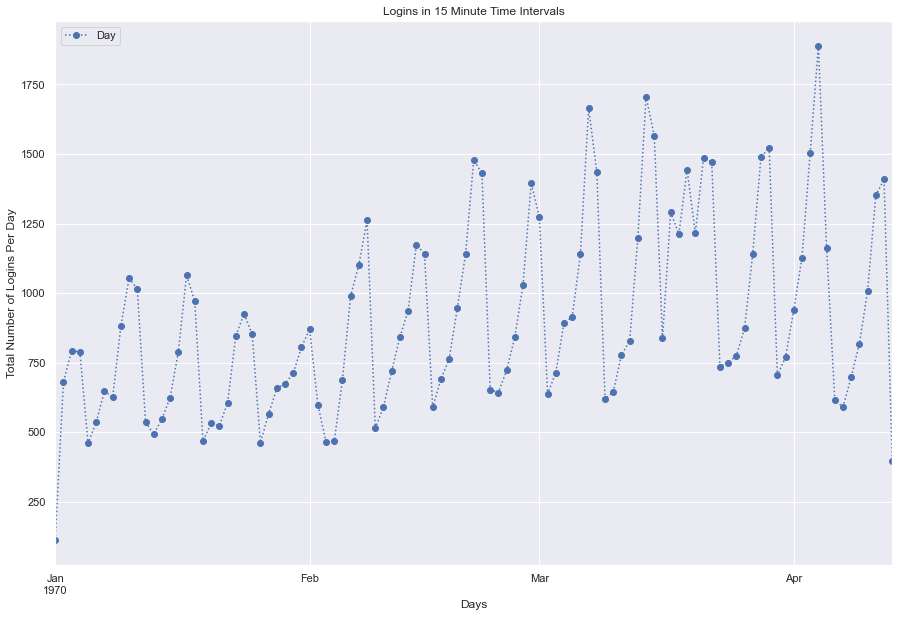

In [12]:
data.resample('D').sum().plot(figsize=(15,10),style=':', marker='o')
plt.xlabel('Days')
plt.ylabel('Total Number of Logins Per Day')
plt.title('Logins in 15 Minute Time Intervals');
plt.legend(['Day', 'resample', 'asfreq'],
           loc='upper left');

The line graph above illustrates daily log in times per 15 minute intervals by day for Ultimate users. There's a predictable ebb and flow in a given week. Logins are low at the beginning of the week but they pick up as the weekend rolls around.

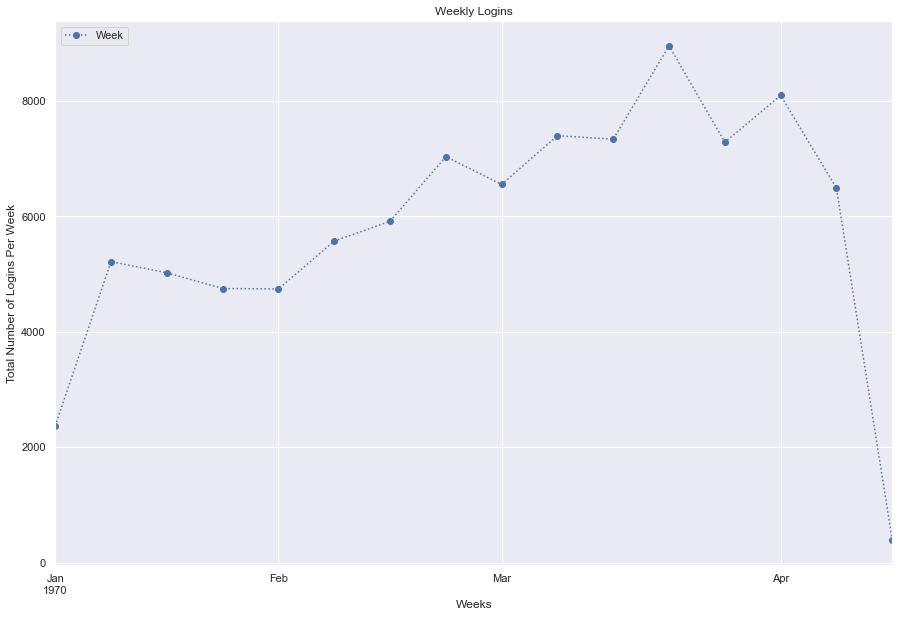

In [13]:
data.resample('W').sum().plot(figsize=(15,10),style=':', marker='o')
plt.xlabel('Weeks')
plt.ylabel('Total Number of Logins Per Week')
plt.title('Weekly Logins');
plt.legend(['Week', 'resample', 'asfreq'],
           loc='upper left');

Mid-March saw the highest spike of logins in a weekly span. There were about 9000 logins!

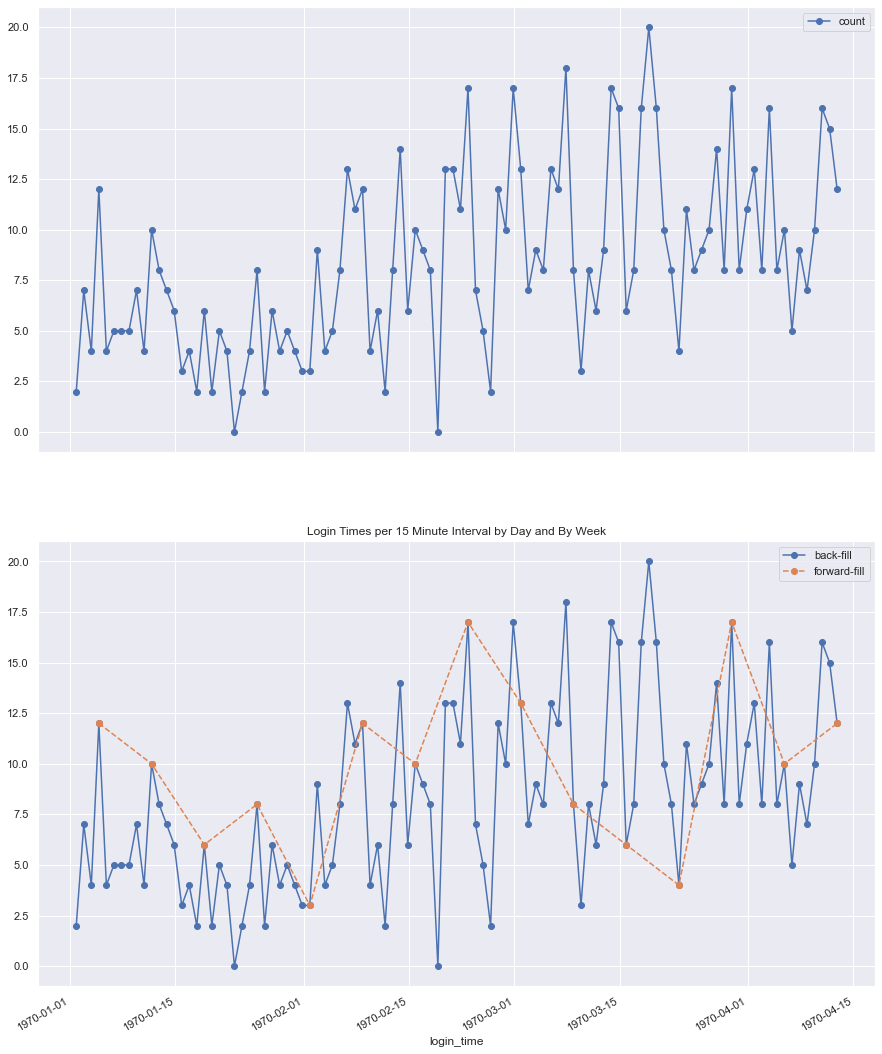

In [14]:
fig, ax = plt.subplots(2, sharex=True)
data.asfreq('D').plot(ax=ax[0], marker='o', figsize=(15,20))
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('W', method='ffill').plot(ax=ax[1], style='--o')
plt.title('Login Times per 15 Minute Interval by Day and By Week')
ax[1].legend(["back-fill", "forward-fill"]);

Each dot represents a 15 minute interval. The orange dashed line represents a week's worth of logins aggregated by 15 minute time intervals. Interestingly, login times per 15 minutes peaked in mid March. Let's take a look at the daily intervals of login times in the month of March. 

In [15]:
march_day = logins_15rs.loc['1970-03-01':'1970-03-31']

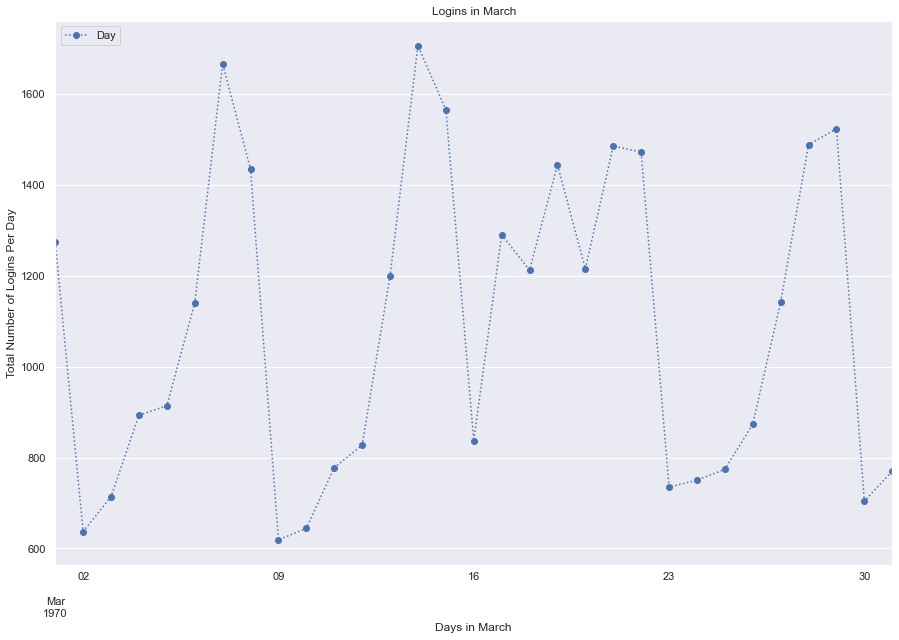

In [16]:
march_day.resample('D').sum().plot(figsize=(15,10),style=':', marker='o')
plt.xlabel('Days in March')
plt.ylabel('Total Number of Logins Per Day')
plt.title('Logins in March');
plt.legend(['Day', 'resample', 'asfreq'],
           loc='upper left');

The first two week of March have similar peaks on the weekends.

## Part 2: Reimbursing the Toll Fees<a id='Part 2: Reimbursing the Toll Fees'></a>

What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. 
 
Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the
observation

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

## Response<a id='Response'></a>

The key measure of success I'd choose are toll fee reimbursements. The presence of a toll fee associated with a driver indicates that they served both Gotham and Metropolis, which is what Ultimate wants. This experiment would be deemed successful if there's a high percentage of reimbursed costs for drivers. The higher the percentage, the more drivers are serving both cities. That, or there are drivers that service both cities and there are other drivers that stick to one locale. I chose this metric because it is a convienient way to gauge driver engagement between the two cities. 


a. I'd implement this experiment by collecting toll fee information for each trip across the bridge. I'd collect the toll fee, driver id, date, time, destination, and point of departure.

b. I would use a one-sided statistical test to hypothesize whether an increase in toll reimbursement yields more driver engagement between both cities.

c. I'd use the collected information to visualize trends between days, weeks, and months. If everything went well, the reimbursement percentage would increase over time as the change was implemented. Ultimate may run into issues if they start to lose money reimbursing their drivers or by compensating them with surge multipliers.

## Part 3: Predictive Modeling<a id='Part 3: Predictive Modeling'></a>

## Data Wrangling<a id='Data Wrangling'></a>

In [17]:
ult_data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [18]:
ult_data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [19]:
ult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The only features missing values are 'phone' and the ratings of and by the drivers. I'll impute missing values with the median and drop non values.

In [20]:
ult_data['avg_rating_of_driver'] = ult_data['avg_rating_of_driver'].fillna(ult_data['avg_rating_of_driver'].median())
ult_data['avg_rating_by_driver'] = ult_data['avg_rating_by_driver'].fillna(ult_data['avg_rating_by_driver'].median())
ult_data.dropna(axis=0, inplace=True)

In [21]:
ult_data = ult_data.reset_index(drop=True)

In [22]:
# Convert date columns to datetime
ult_data['last_trip_date'] = pd.to_datetime(ult_data['last_trip_date'])
ult_data['signup_date'] = pd.to_datetime(ult_data['signup_date'])
print('Range of sign up dates is between {} and {}'
     .format(ult_data['signup_date'].min(), ult_data['signup_date'].max()))

Range of sign up dates is between 2014-01-01 00:00:00 and 2014-01-31 00:00:00


In [23]:
ult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

## EDA<a id='EDA'></a>

Let's visualize the relationships between features.

Text(0.5, 1.0, 'Distributions of Float Variables')

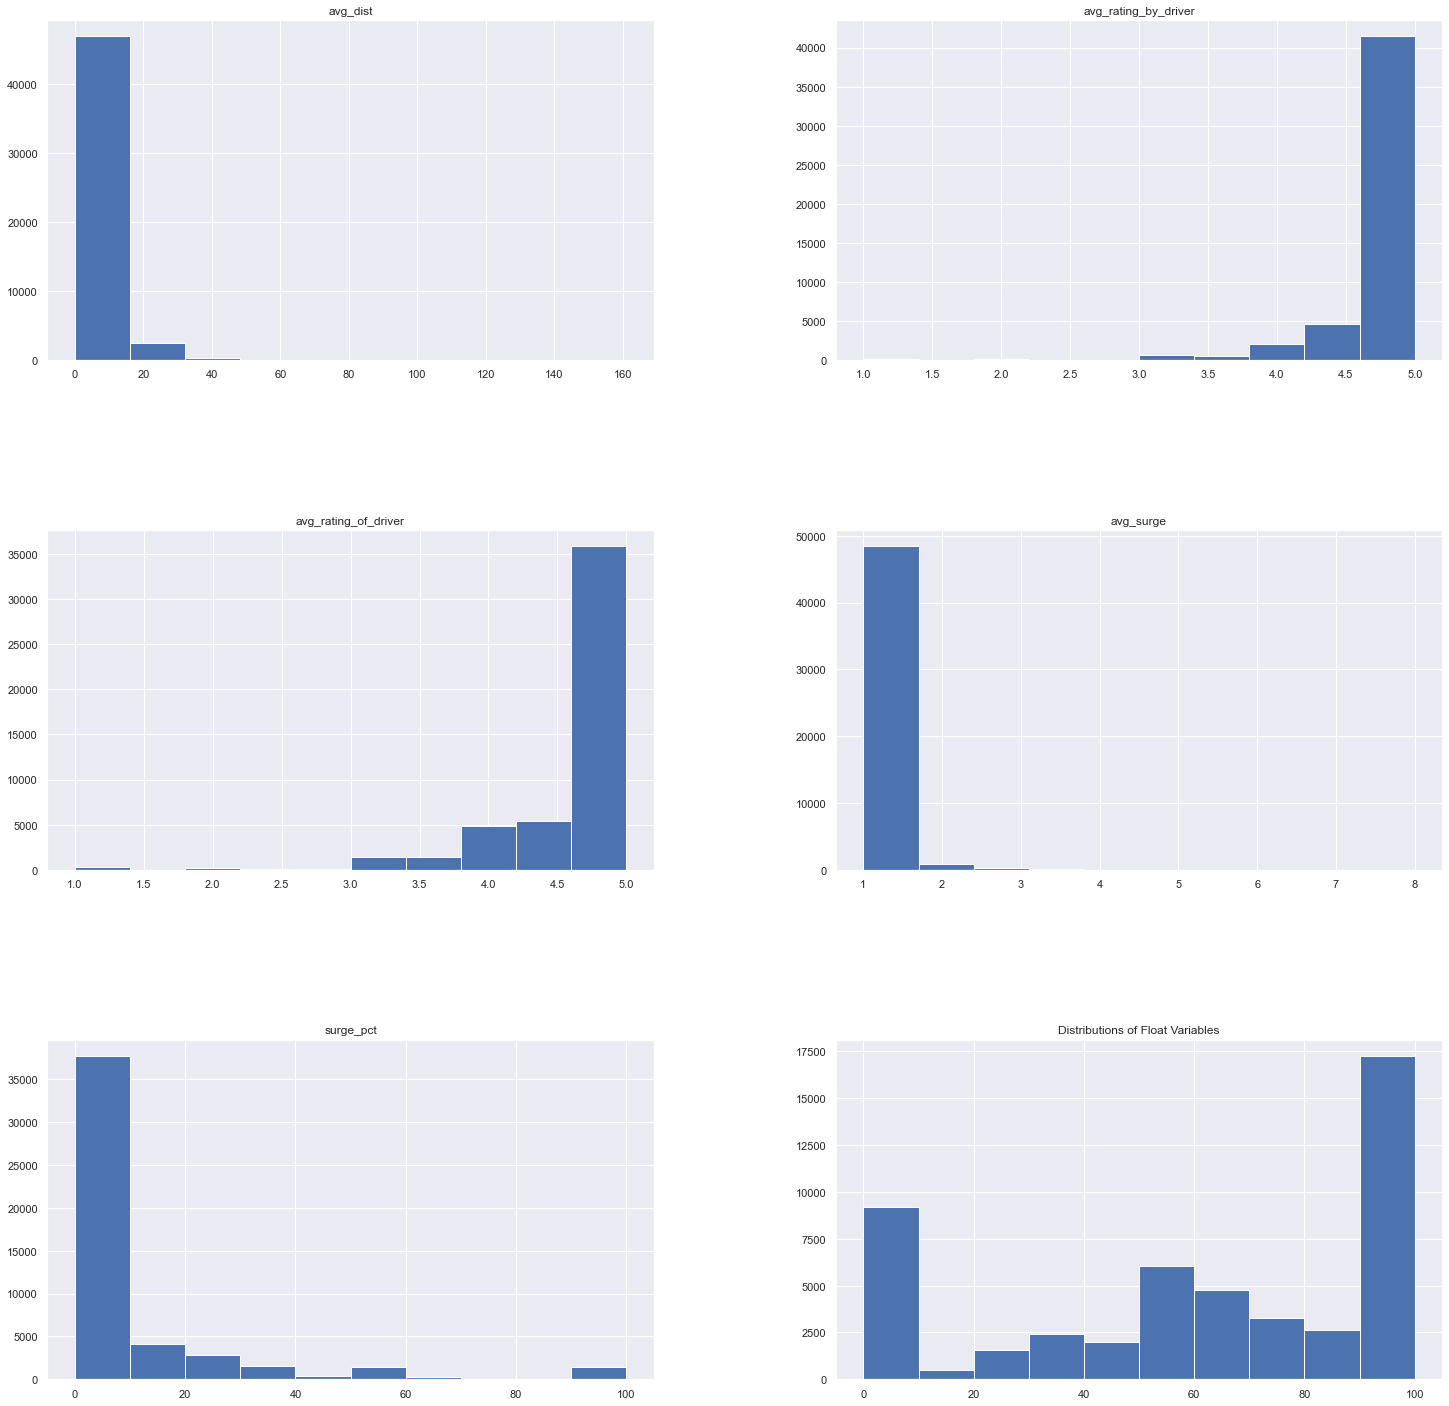

In [24]:
ult_data.select_dtypes('float').hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);
plt.title('Distributions of Float Variables')

In [25]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

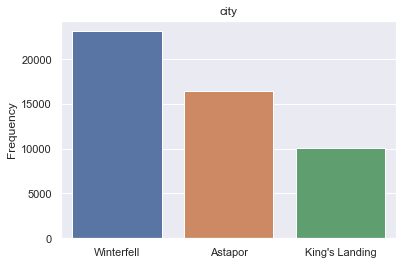

Winterfell        23125
Astapor           16413
King's Landing    10066
Name: city, dtype: int64


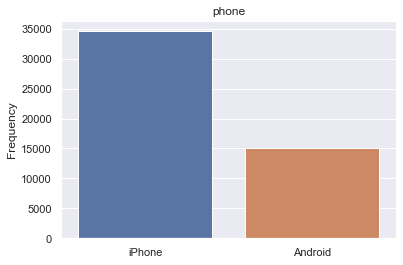

iPhone     34582
Android    15022
Name: phone, dtype: int64


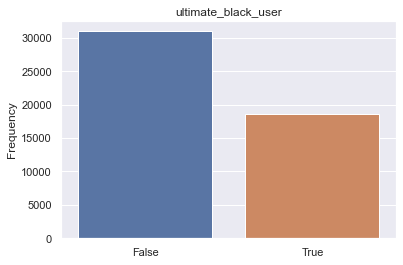

False    30992
True     18612
Name: ultimate_black_user, dtype: int64


In [26]:
for feature in categorical_features:
    sns.barplot(x = list(ult_data[feature].value_counts().index), y = ult_data[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(ult_data[feature].value_counts())

In [27]:
# Show the correlation matrix
corr_matrix = ult_data.corr()

# Filter to see if there are any features correlated at above 0.75. Is there redundancy or highly correlated features?
corr_matrix[(abs(corr_matrix) >= 0.75)& (abs(corr_matrix) < 1.0)]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_of_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_surge,NaN,NaN,NaN,0.793409,NaN,NaN,NaN,NaN
surge_pct,NaN,NaN,0.793409,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rating_by_driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Intuitevly, avg_surge and surge_pct are correlated with each other at about 0.80. A driver's surge percentage and their average surge overall are connected to one another. These two features can stay.

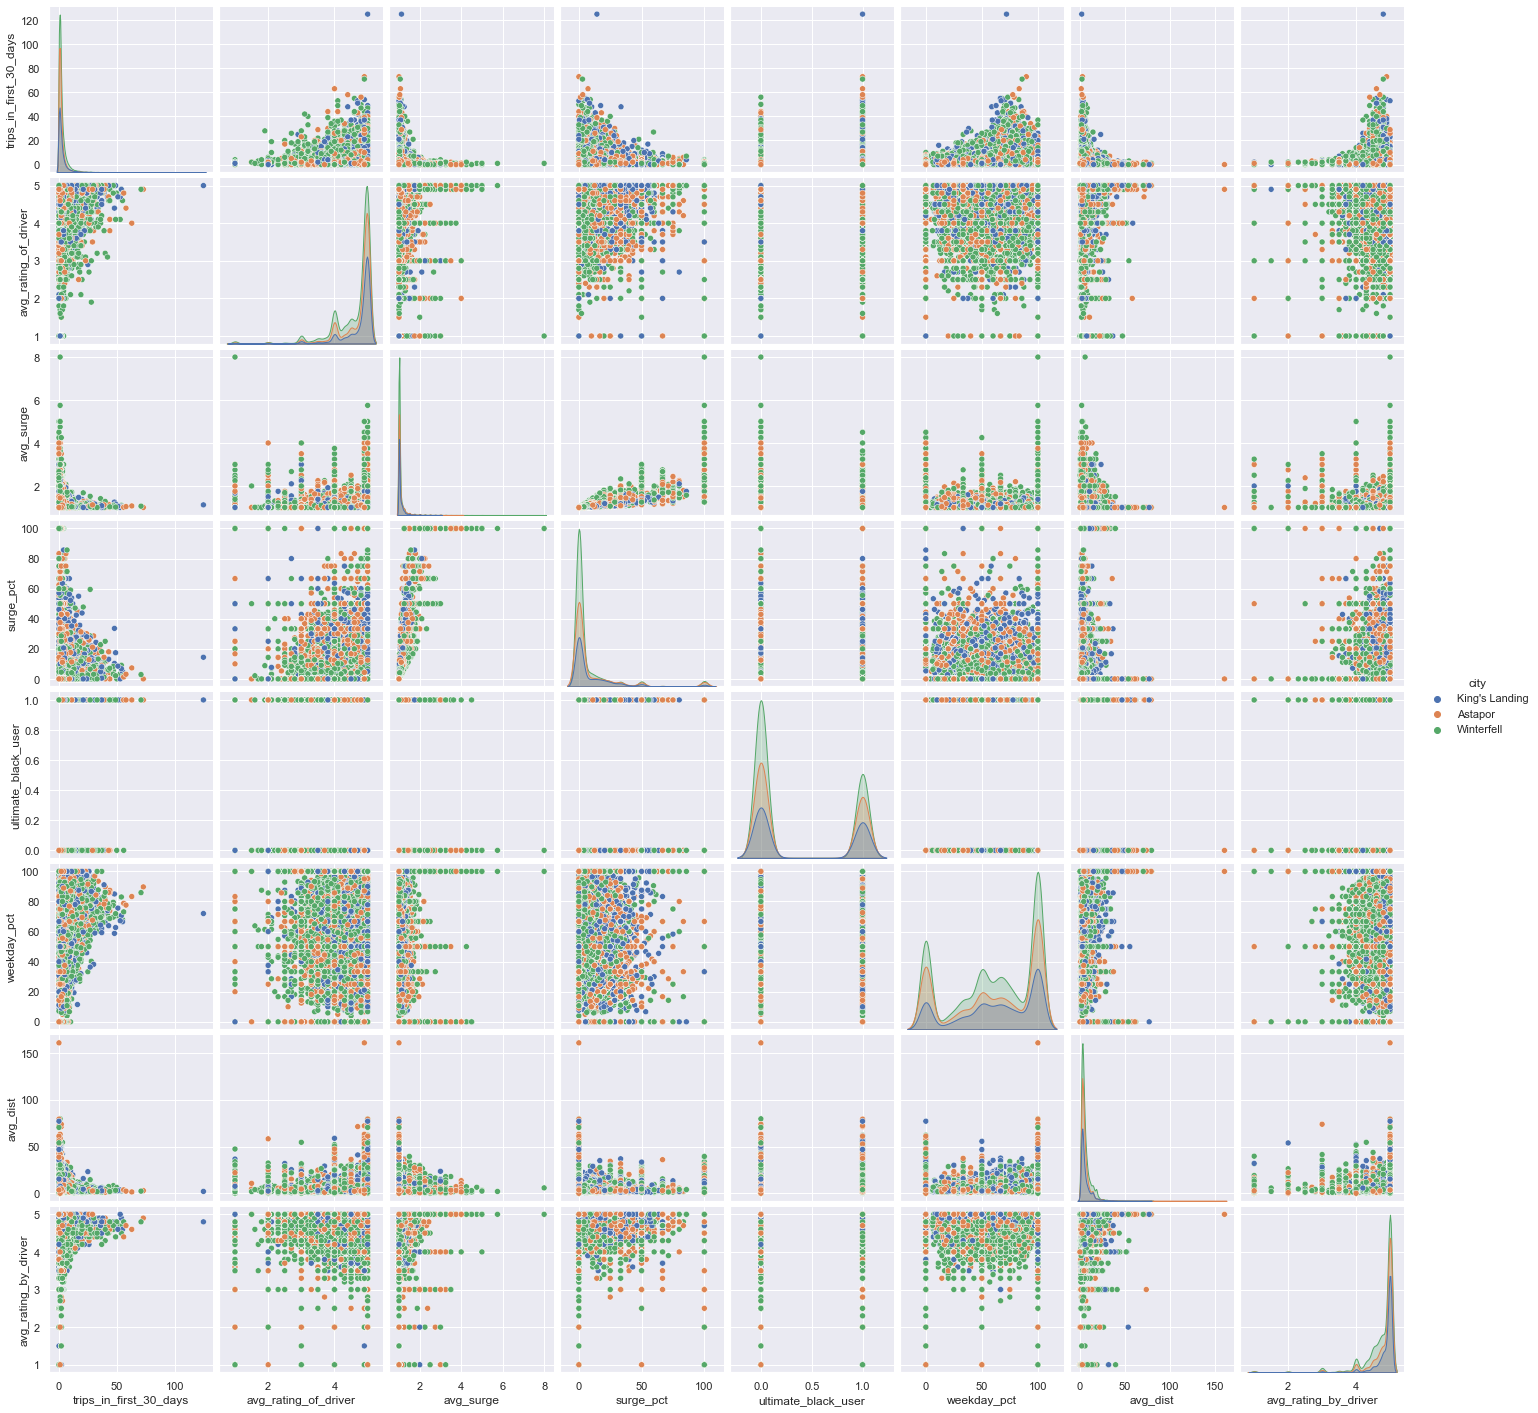

In [28]:
sns.pairplot(ult_data, hue='city')

## Data pre-processing<a id='Data pre-processing'></a>

In [29]:
# Calculate if a user is retained in the 6th month.
ult_data['retained'] = ult_data['last_trip_date']>=pd.to_datetime('2014-06-01')
# Drop dates columns that won't be used again.
ult_data.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

In [30]:
# Convert boolean columns into int.
ult_data['ultimate_black_user'] = ult_data['ultimate_black_user'].astype(int)
ult_data['retained'] = ult_data['retained'].astype(int)
# See how many users were retained.
print('Out of {} users, {} were still active in their 6th month.'
     .format(len(ult_data), ult_data['retained'].sum()))

Out of 49604 users, 18671 were still active in their 6th month.


In [31]:
percent = (ult_data['retained'].sum()/len(ult_data)) * 100
print('{} % were still active in their 6th month.'
     .format(percent))

37.640109668575114 % were still active in their 6th month.


In [32]:
ult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   avg_rating_of_driver    49604 non-null  float64
 3   avg_surge               49604 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               49604 non-null  float64
 6   ultimate_black_user     49604 non-null  int32  
 7   weekday_pct             49604 non-null  float64
 8   avg_dist                49604 non-null  float64
 9   avg_rating_by_driver    49604 non-null  float64
 10  retained                49604 non-null  int32  
dtypes: float64(6), int32(2), int64(1), object(2)
memory usage: 3.8+ MB


## Dummy Features <a id='Dummy Features'></a>

Let's create dummy features for the categorical data.

In [33]:
new_data = pd.get_dummies(ult_data, columns = ['phone','city'], drop_first=True)

In [34]:
new_data

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,phone_iPhone,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,1,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,1,1,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49599,0,5.0,1.00,0.0,0,100.0,5.63,4.2,1,1,1,0
49600,1,4.9,1.00,0.0,0,0.0,0.00,4.0,0,1,0,0
49601,0,5.0,1.00,0.0,1,100.0,3.86,5.0,0,0,0,1
49602,2,3.0,1.00,0.0,0,100.0,4.58,3.5,0,1,0,0


## Train/Test <a id='Train/Test'></a>

In [35]:
X = new_data.drop('retained', axis=1) 
y = new_data['retained']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25, 
    random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37203, 11)
(12401, 11)
(37203,)
(12401,)


## Scaling Numerical Data <a id='Scaling Numerical Data'></a>

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

## Choosing a Machine Learning Model<a id='Choosing a Machine Learning Model'></a>

For this project I will be using a Random Forest Classifier. This algorithm can be used for feature engineering, which will show the most important features in this dataset.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [40]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_tr_scaled, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.75729069 0.75097433 0.7628007  0.7594086  0.75712366]
Average 5-Fold CV Score: 0.7575195950076082


This average 5-fold CV score shows what we can expect the average accuracy to look like with the default model.

## Running the Model<a id='Running the Model'></a>

## Accuracy and F1 Score<a id='Accuracy and F1 Score'></a>

In [41]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_tr_scaled, y_train)
y_pred = model_res.predict(X_te_scaled)
y_pred_prob = model_res.predict_proba(X_te_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.755
Random Forest: f1-score=0.755


## Confusion Matrix and Classification Report<a id='Confusion Matrix and Classification Report'></a>

Confusion matrix, without normalization
[[6233 1517]
 [1525 3126]]
Normalized confusion matrix
[[0.8  0.2 ]
 [0.33 0.67]]


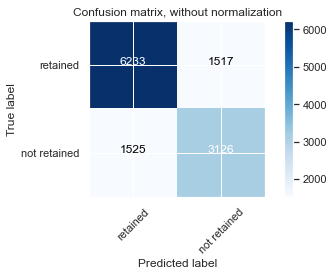

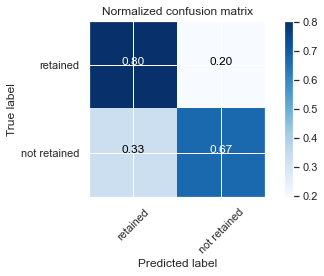

In [42]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names=['retained','not retained'] 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

This confusion matrix shows that this model correctly labeled 80% of retained users. (TP) 33% of users were predicted as retained when they were in fact not.(FP) 20% were labeled as not retained when they actually were. (FN) And finally, 67% of users were correctly labeled as not retained. (TN)

In [43]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7750
           1       0.67      0.67      0.67      4651

    accuracy                           0.75     12401
   macro avg       0.74      0.74      0.74     12401
weighted avg       0.75      0.75      0.75     12401

Test set accuracy: 75.47%


## Feature Importance<a id='Feature Importance'></a>

11


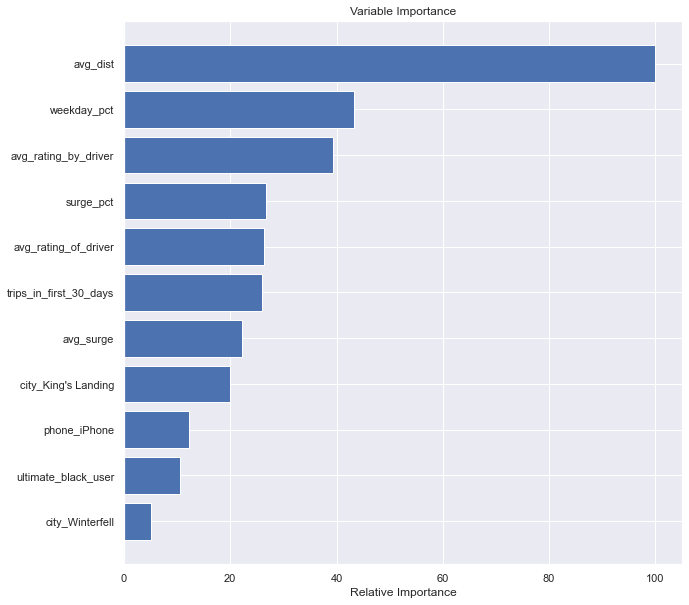

In [44]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The top 3 features are as follows: avg_dist, weekday_pct, and avg_rating_by_driver. Rider retention and these important features make sense. If a user's average distance is low, then they most likely don't use the service enough to become a retained user. They may have their own mode of transportation. It appears retained users take more trips during the weekdays, perhaps they use the service as a means to get to work. Retained users also have good relations with the drivers of the service. The average rating of the user's experience with the service is a solid indicator of user retention.

## ROC Curve and AUC Score<a id='ROC Curve and AUC Score'></a>

Text(0.5, 1.0, 'ROC Curve')

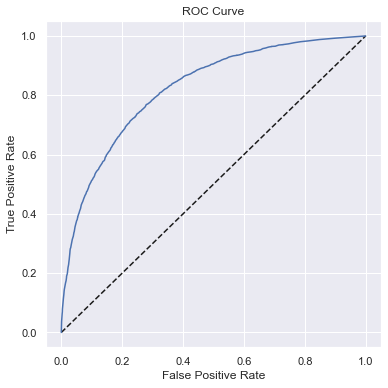

In [45]:
from sklearn.metrics import roc_curve
# Compute predicted probabilities

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [46]:
# Compute and print AUC score
from sklearn.metrics import roc_auc_score
print("AUC: {:.4f}".format(roc_auc_score(y_test, lr_probs)))

AUC: 0.8224


## Suggestions to Ultimate<a id='Suggestions to Ultimate'></a>

In order to improve rider retention, here's my advice for ultimate:

1.) Encourage users to take longer trips, especially in the first 30 days.

2.) Encourage use of the service on weekdays.

3.) Encourage the use of the rating feature to get users to rate each trip. Ideally, trips would go smoothly for both the driver and the user, increasing user retention in the long run.